# TP: Nettoyage d'un jeu de données

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
filepath = "https://filedn.eu/lefeldrXcsSFgCcgc48eaLY/datasets/regression/housing-price_train.csv"
data = pd.read_csv(filepath)
data.drop("Id",axis='columns',inplace=True)
data.head()
df=data.copy()

In [3]:
df.shape

(1460, 80)

## Compréhension des données

Utilisez ces fonctions de  **`Pandas`** pour comprendre les données

 **`head(n)`**
 **`tail(n)`**
 **`info()`**
 **`describe()`**
 **`shape`**
 **`columns`**
 **`isnull().sum()`**
 **`value_counts()`**
 **`unique()`**

## Préparation des données

1) Quelles sont les différences entre les trois méthodes de mise à l'échelle abordées dans le cours ? Dans quels cas chacune d'elles est utilisés ?


1. StandardScaler
-Fonctionnement : Centre les données en les ramenant à une distribution avec une moyenne de 0 et un écart-type de 1. Cela signifie que les valeurs vont principalement osciller entre -1 et 1, sans limiter spécifiquement les valeurs extrêmes.
-Quand l’utiliser : Adapté aux algorithmes qui supposent des données normalement distribuées, comme la régression linéaire ou les réseaux de neurones. Il est utile si les données ont une distribution gaussienne (en cloche).

2. MinMaxScaler
-Fonctionnement : Redimensionne les valeurs pour les faire entrer dans une plage spécifique, généralement entre 0 et 1, mais on peut aussi choisir d’autres intervalles. La formule est : 
-Quand l’utiliser : Idéal pour les données qui n'ont pas de distribution normale et qui contiennent des valeurs bornées. On l’utilise souvent dans les algorithmes de distance comme le k-NN et en traitement d’images.

3. RobustScaler
-Fonctionnement : Utilise la médiane et l'intervalle interquartile (IQR) pour centrer et réduire les valeurs. Les valeurs sont redimensionnées selon les quantiles, ce qui limite l'impact des valeurs extrêmes.
-Quand l’utiliser : Particulièrement utile pour les données avec des outliers importants, car il est moins sensible aux valeurs extrêmes. Il est donc efficace dans les cas où les données ne suivent pas une distribution normale ou contiennent des aberrations.

Resumen:
StandardScaler|	Données normalement distribuées|	Haute
MinMaxScaler  |	Données avec une plage bornée  |	Haute
RobustScaler  |	Données avec des outliers      |	Faible

2) Même question pour les méthodes de codage

Les encodeurs LabelEncoder, OrdinalEncoder, et OneHotEncoder sont utilisés en machine learning pour convertir des variables catégorielles en valeurs numériques.
1. LabelEncoder
- Fonctionnement : Convertit chaque catégorie d'une variable en un nombre entier unique. Par exemple, pour une colonne Couleur contenant Rouge, Vert, Bleu, LabelEncoder assignerait Rouge = 0, Vert = 1, Bleu = 2.
- Quand l’utiliser : Utilisé pour des variables catégorielles ordinales ou des variables sans relation d’ordre, mais où la transformation en nombres est suffisante. Par exemple, pour des étiquettes dans la classification.
- Limitation : LabelEncoder n’est pas adapté aux données catégorielles nominales dans les modèles qui risquent de voir un ordre là où il n’y en a pas.

2. OrdinalEncoder
- Fonctionnement : Similaire à LabelEncoder, il convertit les catégories en nombres entiers, mais avec une signification d'ordre spécifique. Les valeurs sont attribuées en fonction de la position ordinale de chaque catégorie.
- Quand l’utiliser : Parfait pour les variables catégorielles ordinales, où il existe un ordre logique entre les catégories. Par exemple, pour une colonne Éducation avec des valeurs Primaire, Secondaire, Universitaire, où Primaire = 0, Secondaire = 1, Universitaire = 2.
- Limitation : Non recommandé pour les variables nominales sans ordre, car cela pourrait introduire un ordre artificiel dans les données.

3. OneHotEncoder
- Fonctionnement : Crée une colonne binaire (0 ou 1) pour chaque catégorie. Par exemple, pour une variable Couleur contenant Rouge, Vert, Bleu, OneHotEncoder créerait trois colonnes : Couleur_Rouge, Couleur_Vert, Couleur_Bleu, et chaque ligne n'aurait qu'une seule colonne activée (1) en fonction de la couleur.
- Quand l’utiliser : Approprié pour les variables catégorielles nominales sans ordre. Utile dans les algorithmes sensibles aux distances, comme le k-NN ou la régression logistique.
- Limitation : Peut générer un grand nombre de colonnes pour des variables avec de nombreuses catégories, ce qui augmente la dimensionnalité des données (ce qu’on appelle le "curse of dimensionality").

3) Étudier les valeurs manquantes et justifier votre choix de supprimer la colonne, d'utiliser une simple imputation ou de remplacer les NaN par des valeurs significatives.

In [4]:
percent_null= data.isnull().sum()*100 / len(data)
percent_null.sort_values(ascending=False,inplace=True)

percent_null.head(10)

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
MasVnrType     59.726027
FireplaceQu    47.260274
LotFrontage    17.739726
GarageYrBlt     5.547945
GarageCond      5.547945
GarageType      5.547945
dtype: float64

Text(0.5, 1.0, 'Répartition du pourcentage de valeurs manquantessupérieures au seuil de {threshold_view}%')

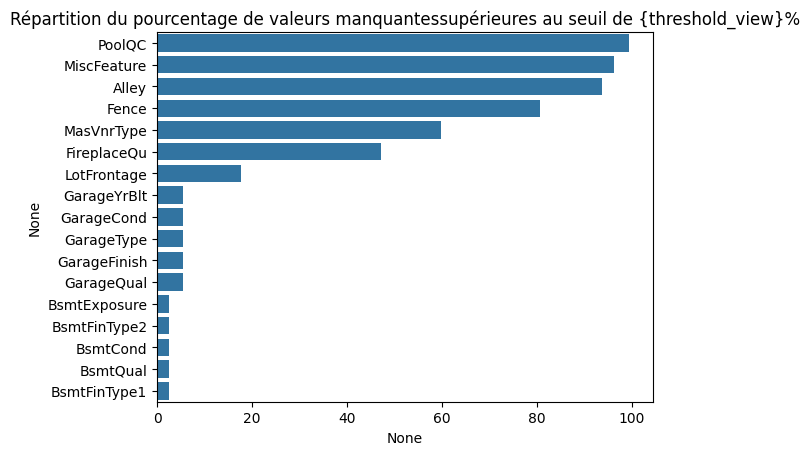

In [5]:

threshold_view = 2

filtered = percent_null[percent_null.values > threshold_view]
ax = sns.barplot(x = filtered, y = filtered.index, orient='h');
ax.set_title(f"Répartition du pourcentage de valeurs manquantes"
             "supérieures au seuil de {threshold_view}%")


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
# suprimer les columns superior a 70% de valeurs nulls
threshold = 50
columns_to_drop = percent_null[
    percent_null.values > threshold].index

In [8]:
# voir le columns suprimer
columns_to_drop

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType'], dtype='object')

In [9]:
# le dataframe sans le columns suprimer
data.drop(columns_to_drop, axis='columns', inplace=True)

Remplace les valeurs manquantes 

In [10]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [11]:
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64

## Imputation de valeur manquante in colonnes numeriques

In [12]:
#columns numeriques
data_numeric=data.select_dtypes(include=[np.number])


In [13]:
data_numeric.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
# imputation des valeurs 
from sklearn.impute import SimpleImputer
imputation = SimpleImputer(missing_values = np.nan, 
                           strategy = 'mean')

In [15]:
imputation.fit(data_numeric)

SimpleImputer()

In [16]:
data_numeric.loc[:, :] = imputation.transform(data_numeric)

In [17]:
# verifie qu'il n'y a pas de valeurs null
data_numeric.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [18]:
def plot_histo(data_col):
        plt.figure(figsize=(8, 4))  # Ajustar el tamaño de cada gráfico individual
        sns.histplot(data_col, kde=True, bins=30)  # Histograma con KDE
        plt.title('Distribution of ' f'{data_col.name}')  # Títre dinámique
        plt.ylabel('Frequency')
        plt.show()

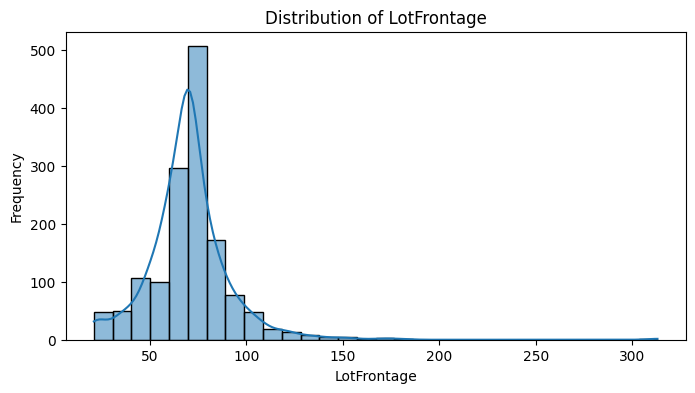

In [19]:
plot_histo(data_numeric.LotFrontage)

## Imputation des valeurs null non numerique

In [20]:
# selectione les columns non numeriques
data_not_numeric=data.select_dtypes(exclude=[np.number])

In [21]:
data_not_numeric.isnull().sum()*100 / len(data)

MSZoning          0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functional        0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
PavedDrive        0.000000
SaleType          0.000000
S

In [22]:
# imputation des valeurs non numeriques
from sklearn.impute import SimpleImputer
imputation_not_numerique = SimpleImputer(missing_values = np.nan, 
                           strategy = 'most_frequent')

In [23]:
imputation_not_numerique.fit(data_not_numeric)

SimpleImputer(strategy='most_frequent')

In [24]:
data_not_numeric.loc[:, :] = imputation_not_numerique.transform(data_not_numeric)

In [25]:
#verification s'il n'y a pas de valeurs null
data_not_numeric.isnull().sum()*100 / len(data)

MSZoning         0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
KitchenQual      0.0
Functional       0.0
FireplaceQu      0.0
GarageType       0.0
GarageFinish     0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
SaleType         0.0
SaleCondition    0.0
dtype: float64

4) Séparer les feautres dans des listes, par exemple ```feautres_to_ohe = [ "f1", "f2", ...]" ``` .( features_to_standarization, features_to_normalization,..)

In [26]:
def value_categories(dataframe):
    summary = []
    
    for column in dataframe.columns:
        # Contar los valores únicos
        counts = dataframe[column].value_counts()
        unique_values = counts.index.tolist()  # Obtener los valores únicos como lista
        counts_values = counts.values.tolist()  # Obtener los conteos como lista
        
        # Agregar los resultados al DataFrame summary
        summary.append({
            'Column': column,
            'Unique Values': unique_values,
            'Counts': counts_values
        })
    summary_df = pd.DataFrame(summary)
    return summary_df

In [27]:
value_categories(data_not_numeric)

,Column,Unique Values,Counts
0,MSZoning,"[RL, RM, FV, RH, C (all)]","[1151, 218, 65, 16, 10]"
1,Street,"[Pave, Grvl]","[1454, 6]"
2,LotShape,"[Reg, IR1, IR2, IR3]","[925, 484, 41, 10]"
3,LandContour,"[Lvl, Bnk, HLS, Low]","[1311, 63, 50, 36]"
4,Utilities,"[AllPub, NoSeWa]","[1459, 1]"
5,LotConfig,"[Inside, Corner, CulDSac, FR2, FR3]","[1052, 263, 94, 47, 4]"
6,LandSlope,"[Gtl, Mod, Sev]","[1382, 65, 13]"
7,Neighborhood,"[NAmes, CollgCr, OldTown, Edwards, Somerst, Gi...","[225, 150, 113, 100, 86, 79, 77, 74, 73, 59, 5..."
8,Condition1,"[Norm, Feedr, Artery, RRAn, PosN, RRAe, PosA, ...","[1260, 81, 48, 26, 19, 11, 8, 5, 2]"
9,Condition2,"[Norm, Feedr, Artery, RRNn, PosN, PosA, RRAn, ...","[1445, 6, 2, 2, 2, 1, 1, 1]"


In [28]:
col= data_not_numeric.columns
col

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

## tranformation onehotencoder des variables categoriques

5) Appliquer les méthodes de features engineering adéquates sur chaque liste

In [29]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

In [30]:
one_hot = OneHotEncoder()
one_hot.fit(data_not_numeric)

OneHotEncoder()

In [31]:
encoded_features = one_hot.transform(data_not_numeric).toarray()
encoded_features

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [32]:
encoded_features_names = one_hot.get_feature_names_out()
encoded_features_names

array(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod',
       'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWIS

In [33]:
data_one_hot= pd.DataFrame(encoded_features,
            columns = encoded_features_names)

In [34]:
data_one_hot

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## transformation des variables numeriques

In [35]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

: 

In [36]:
data_numeric.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# def plot_all_numerique(data_col):
#     #for i in data_col:
#         plt.figure(figsize=(8, 4))  # Ajuste le grapha

#         plt.subplot(1, 2, 1)
#         sns.histplot(data_col, kde=True, bins=30)  # Histo ou boxplot
        
#         plt.subplot(1, 2, 2)
#         sns.boxplot(data_col)

#         #titre et frequence
#         plt.title(' ' f'{data_col.name}')  # Títre dinámique
#         plt.ylabel('')
        
#         plt.tight_layout()
#         plt.show()

In [ ]:
def plot_all_numerique(df):
    # Filtre les columns numeriques
    numeric_cols = df.select_dtypes(include='number').columns

    for col in numeric_cols:
        plt.figure(figsize=(14, 5))  # Taille des graphes

        # Histograme con KDE
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {col} - Histogram')  # Títre específique
        plt.xlabel('')  # axis X vide
        plt.ylabel('')  # axis  Y vide

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col], color='lightgreen')
        plt.title(f'Distribution of {col} - Boxplot')  # Títre específique
        plt.xlabel('')  # # axis X vide
        plt.ylabel('')  # # axis Y vide

        plt.suptitle(f'Distribution Analysis for {col}', fontsize=16)  # Títre general
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste l'espace du titre
        plt.show()


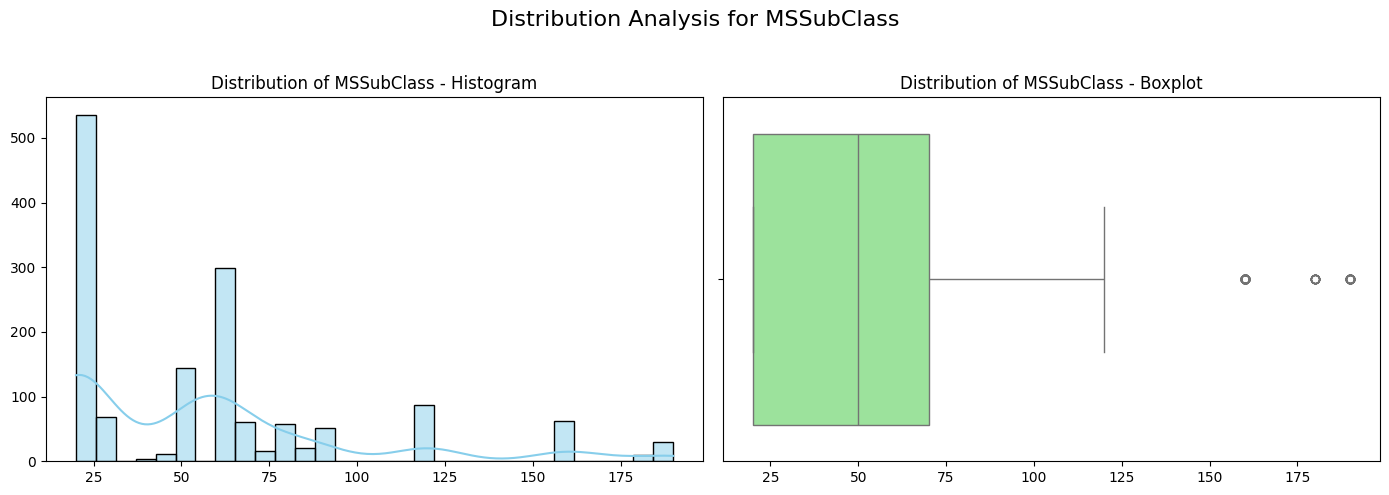

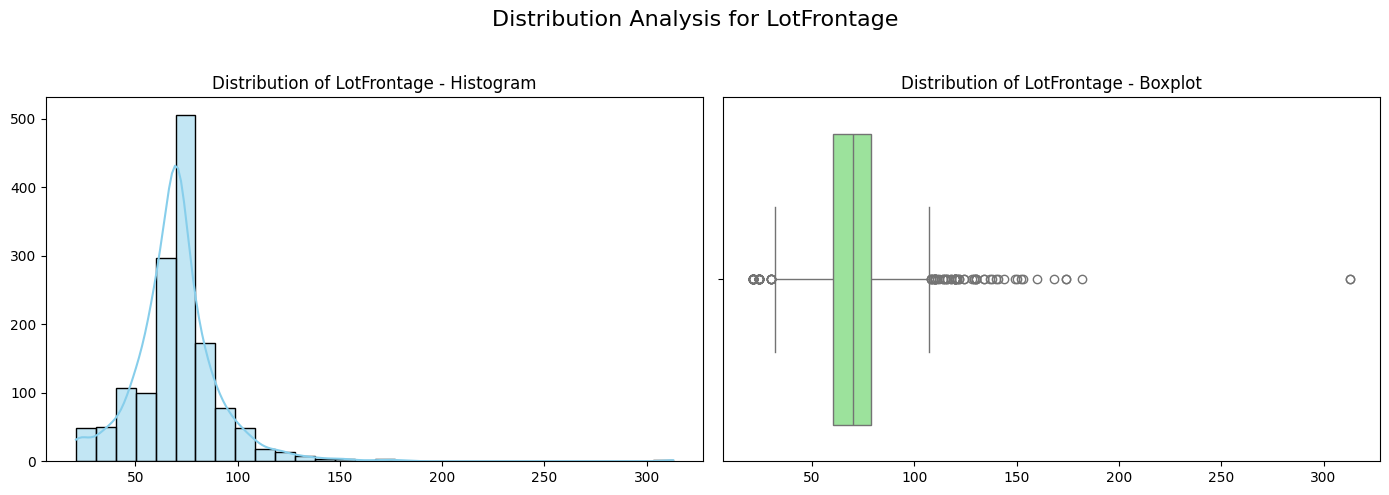

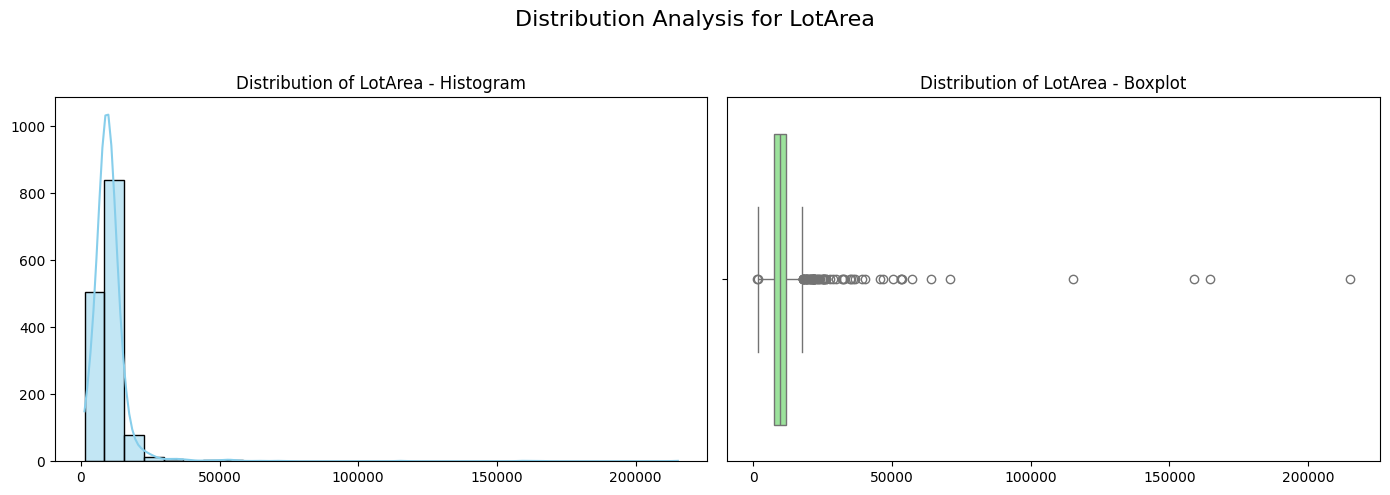

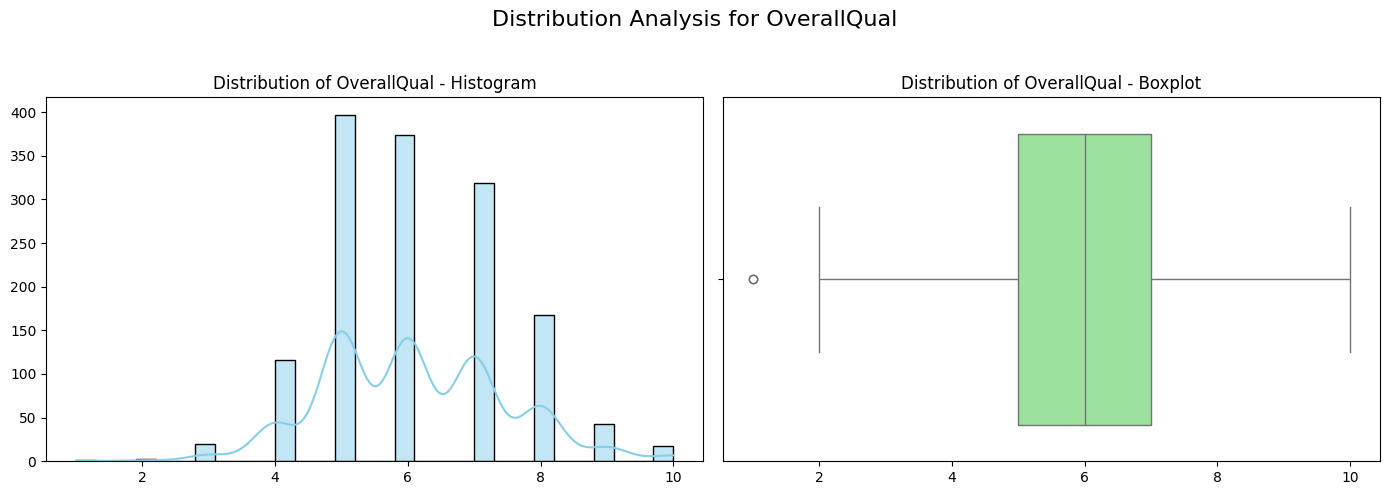

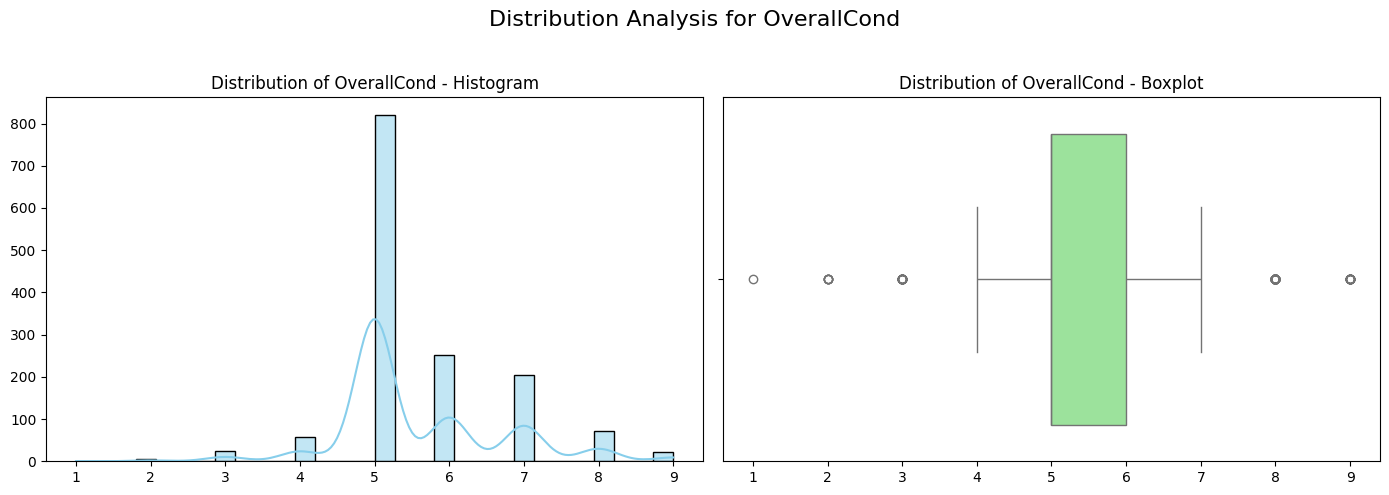

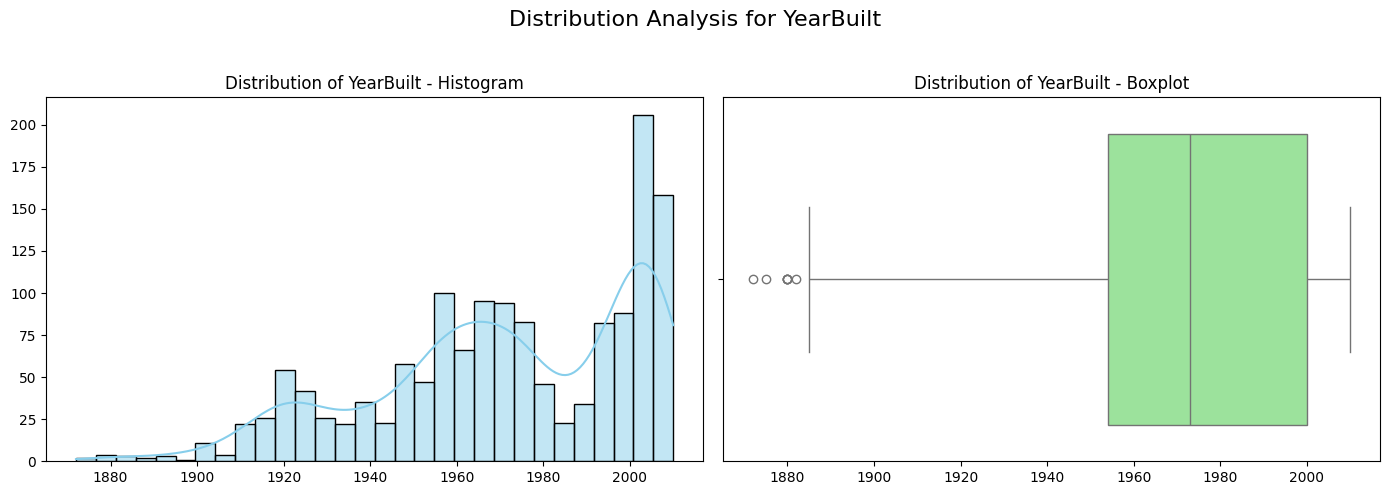

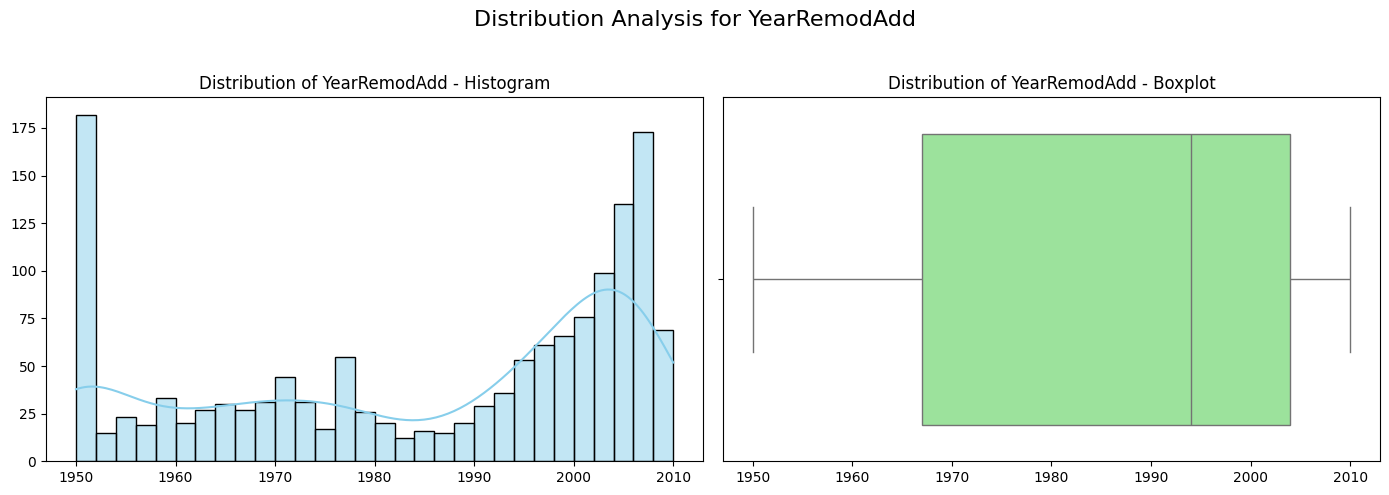

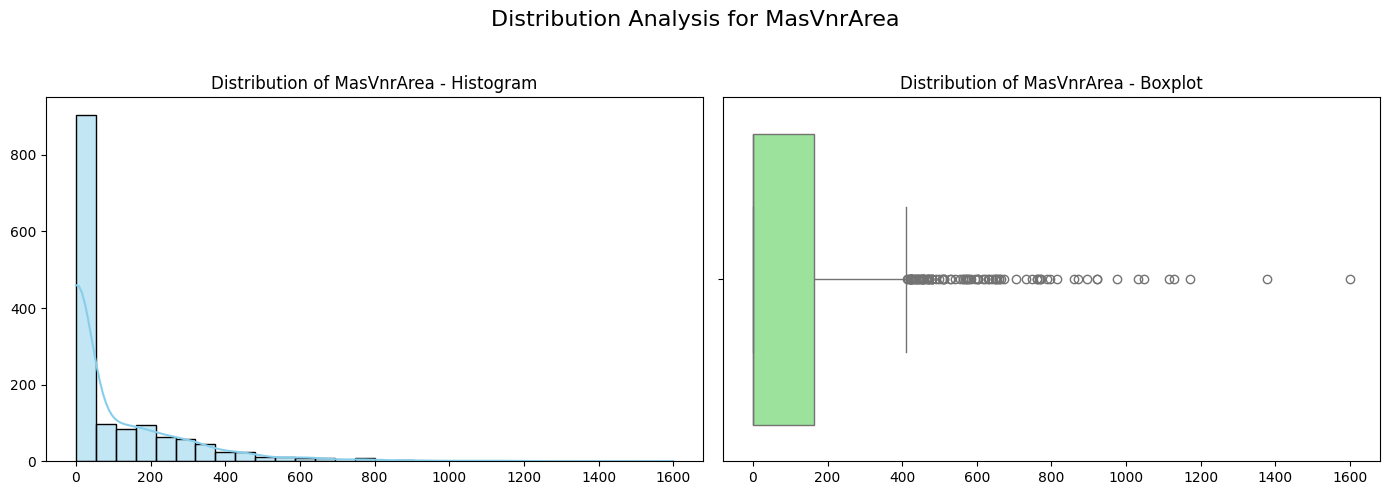

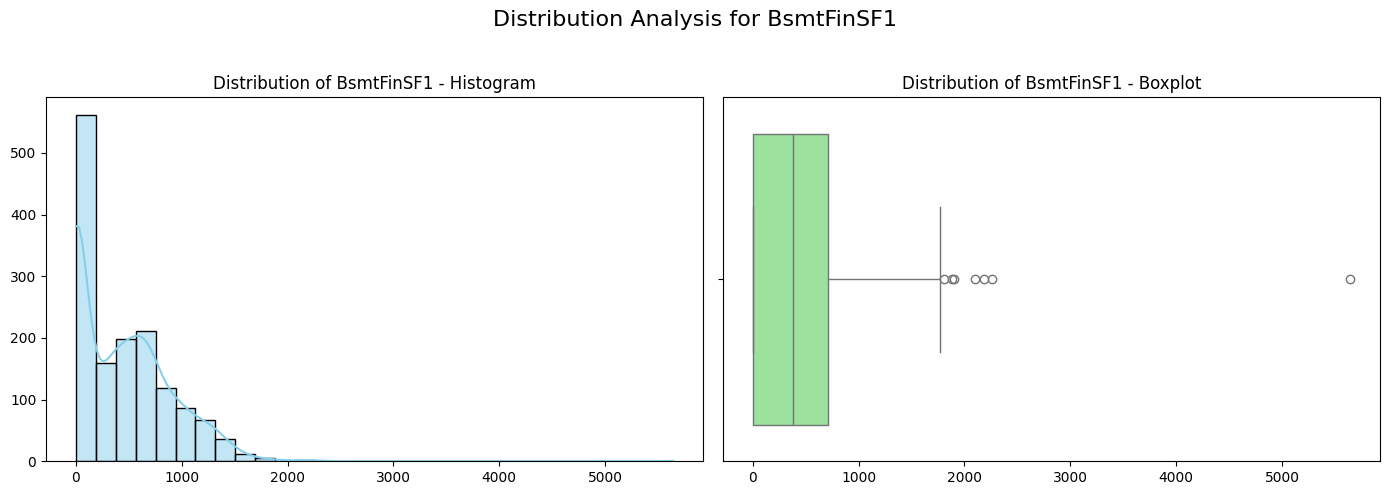

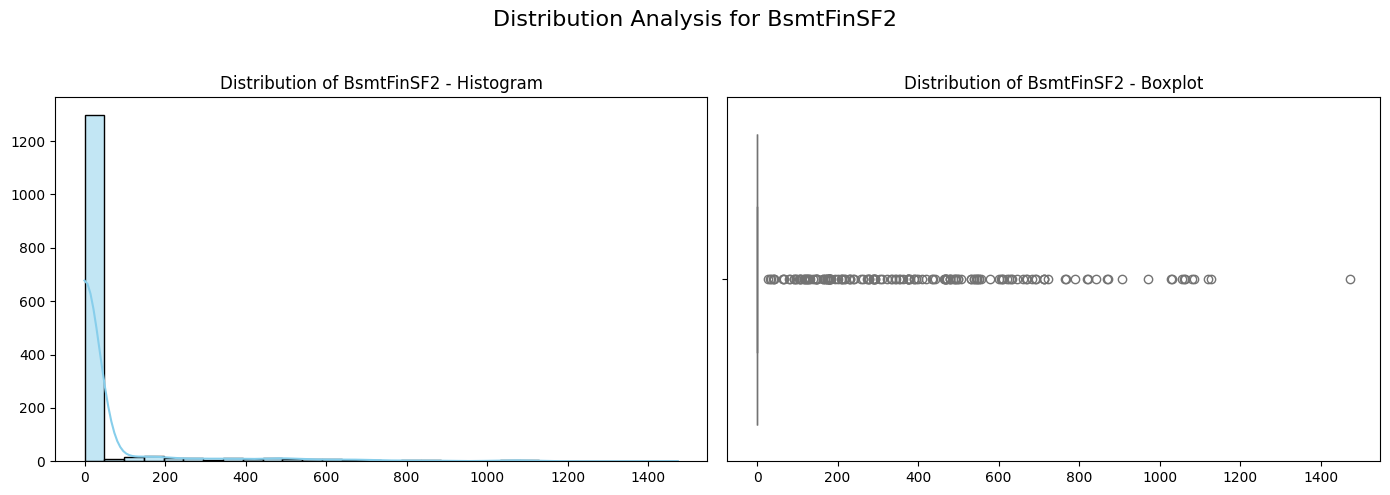

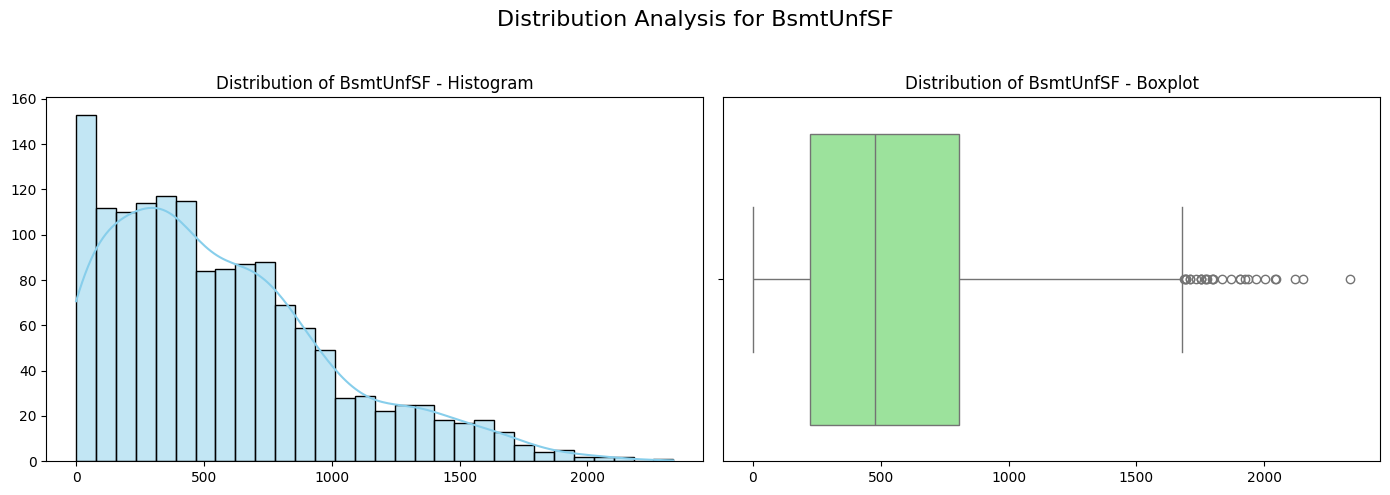

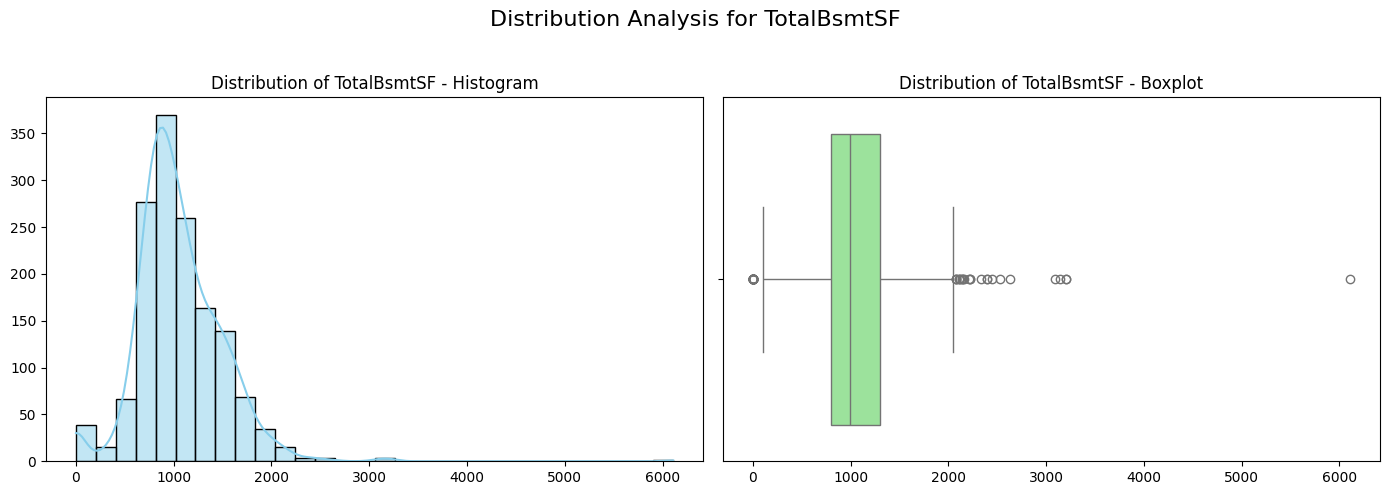

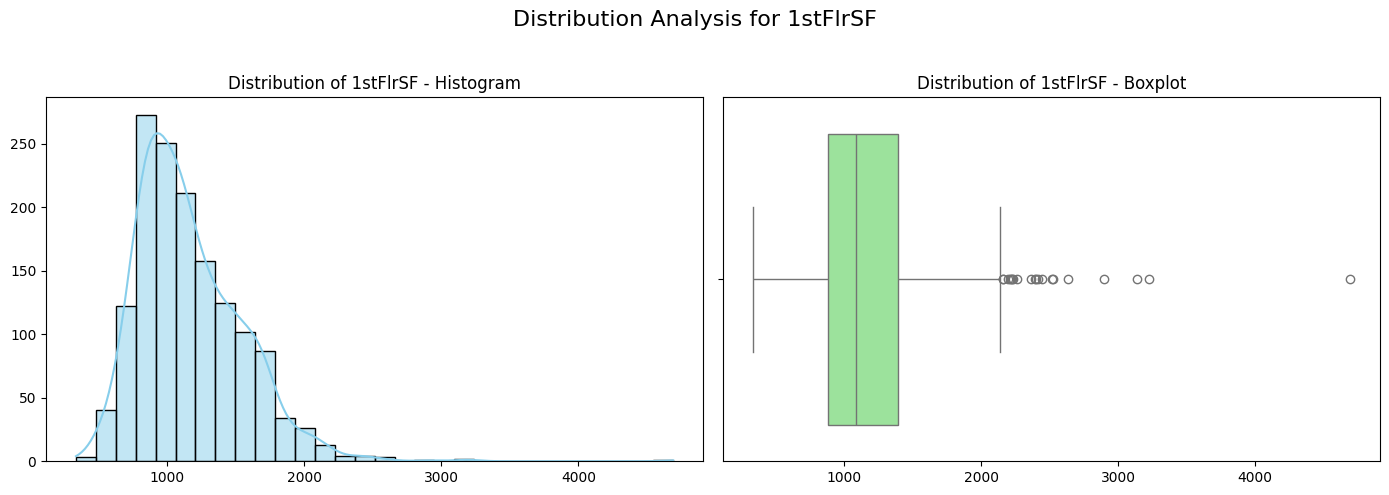

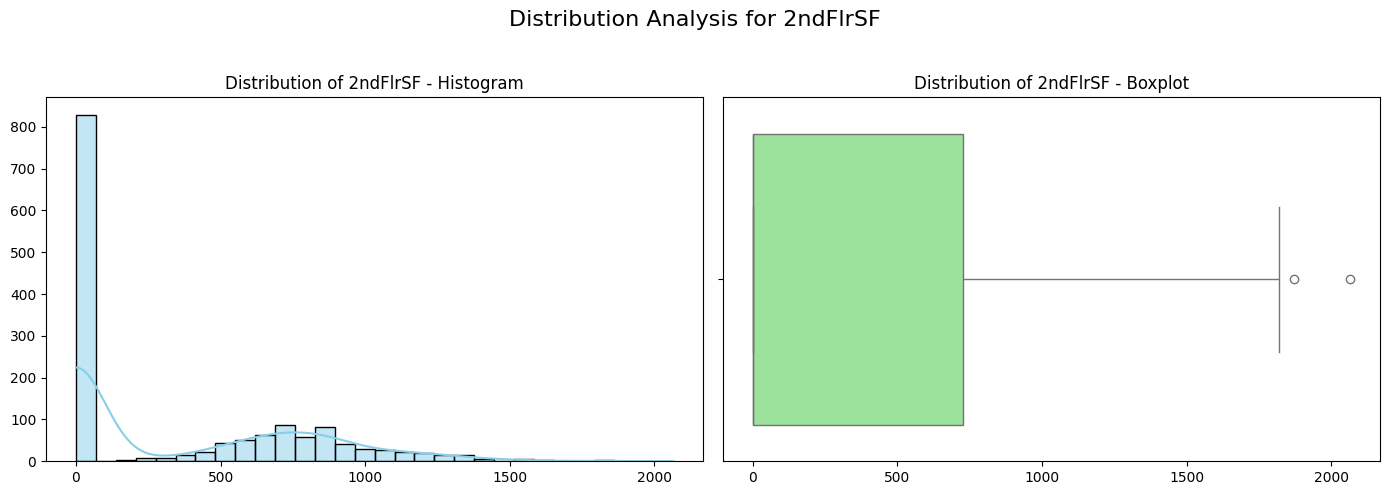

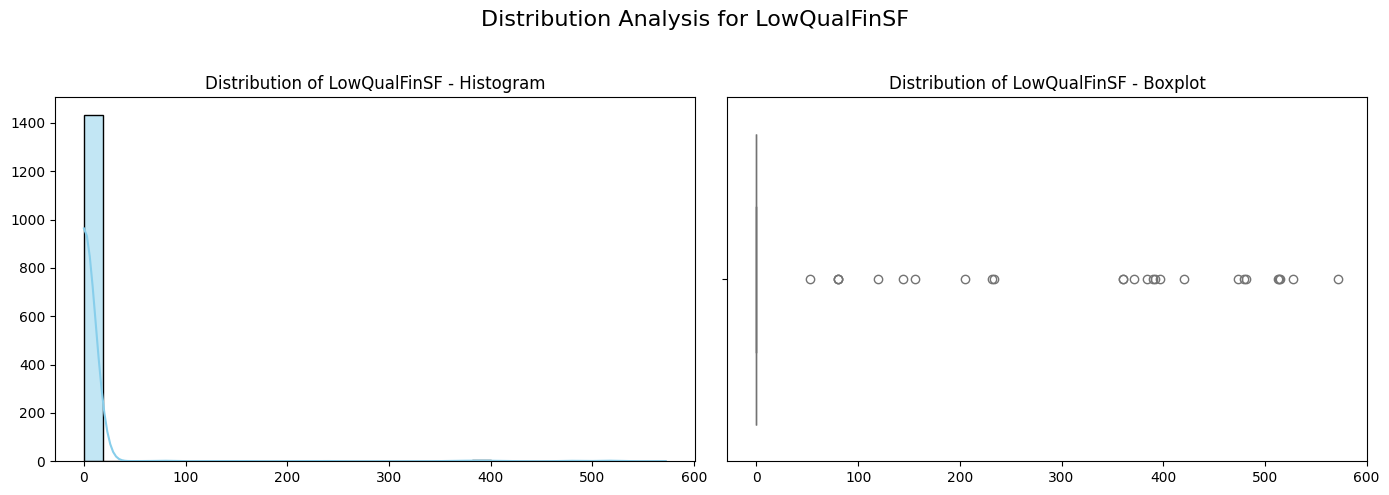

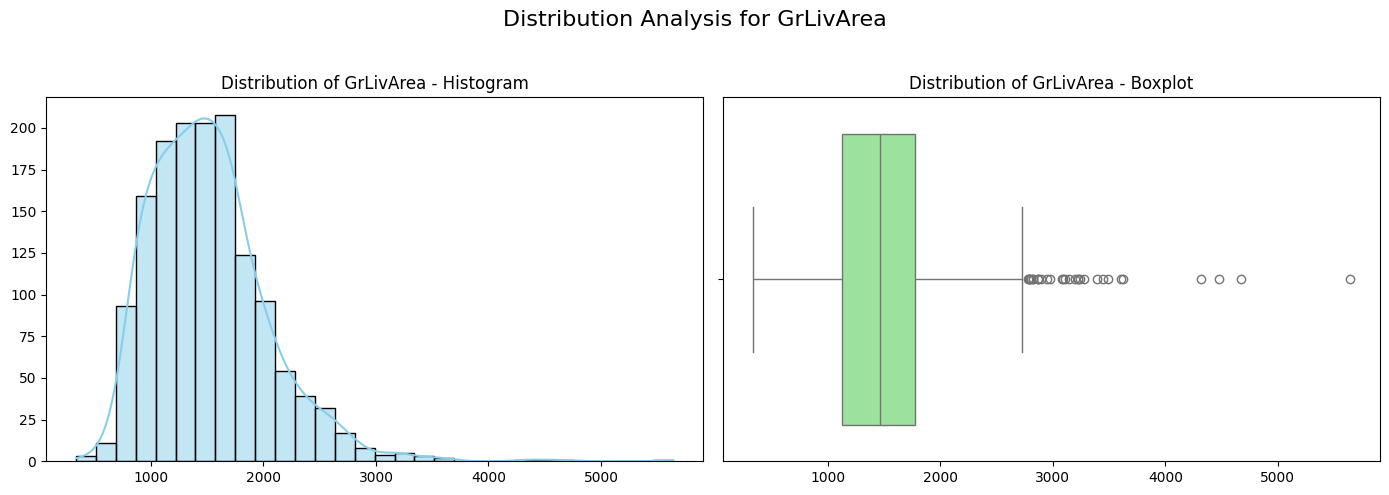

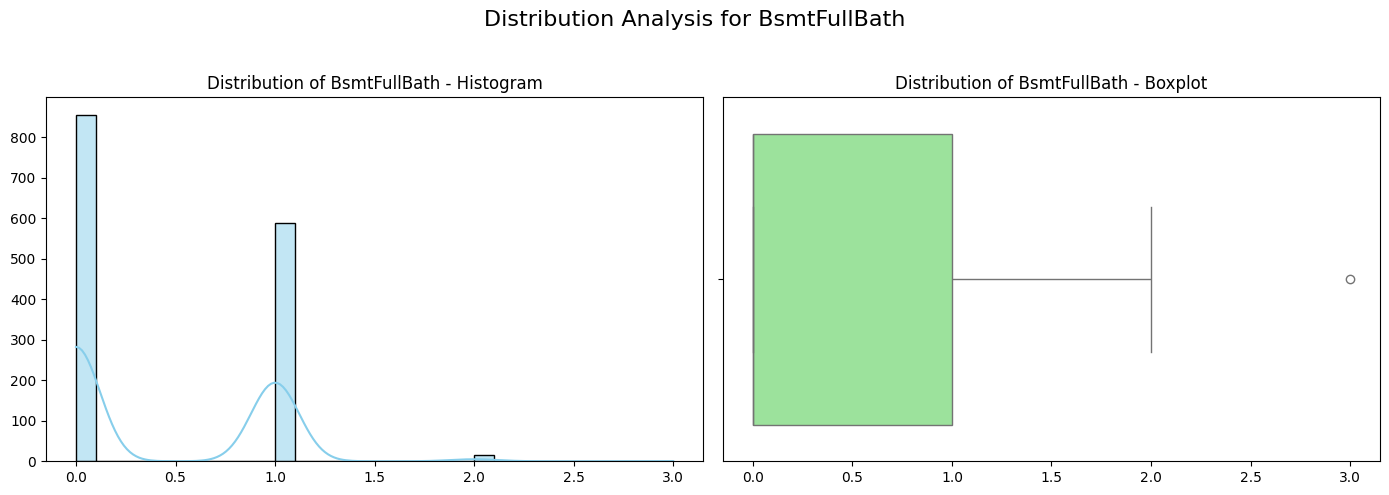

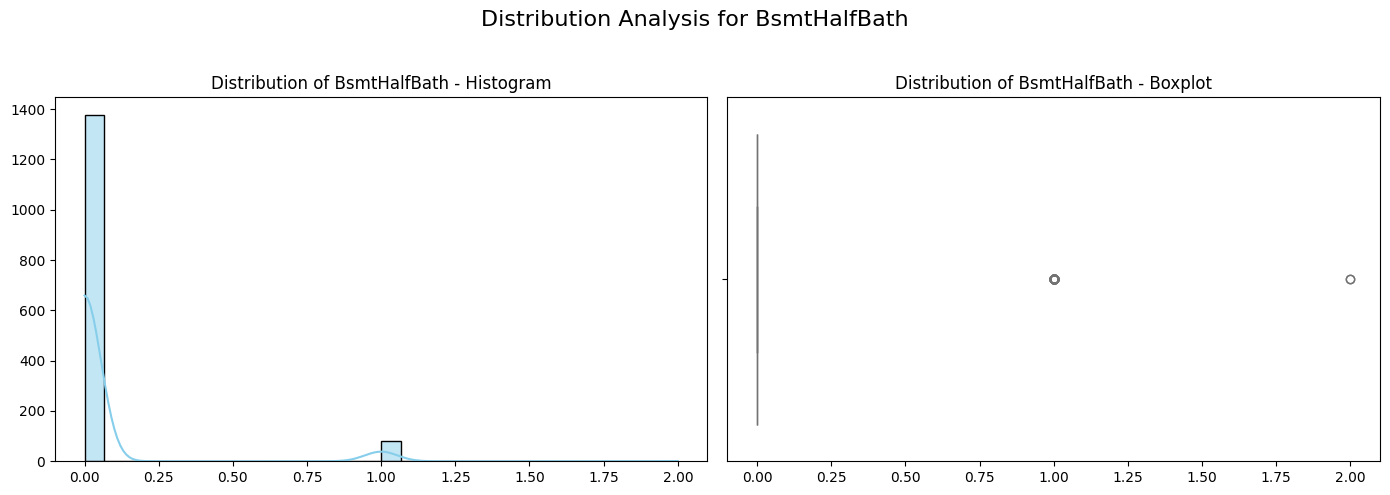

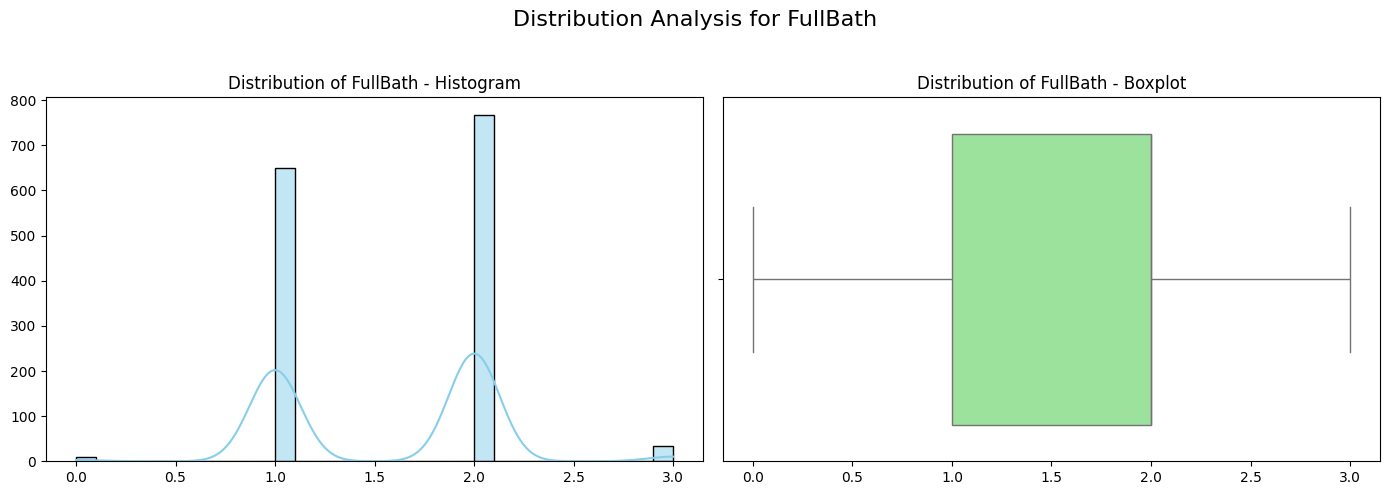

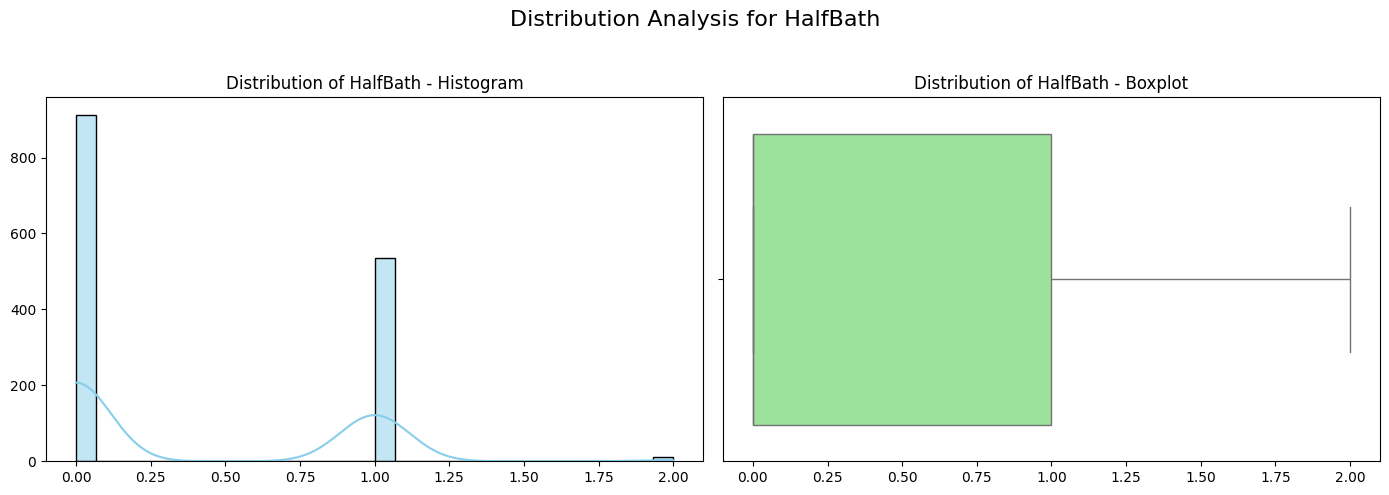

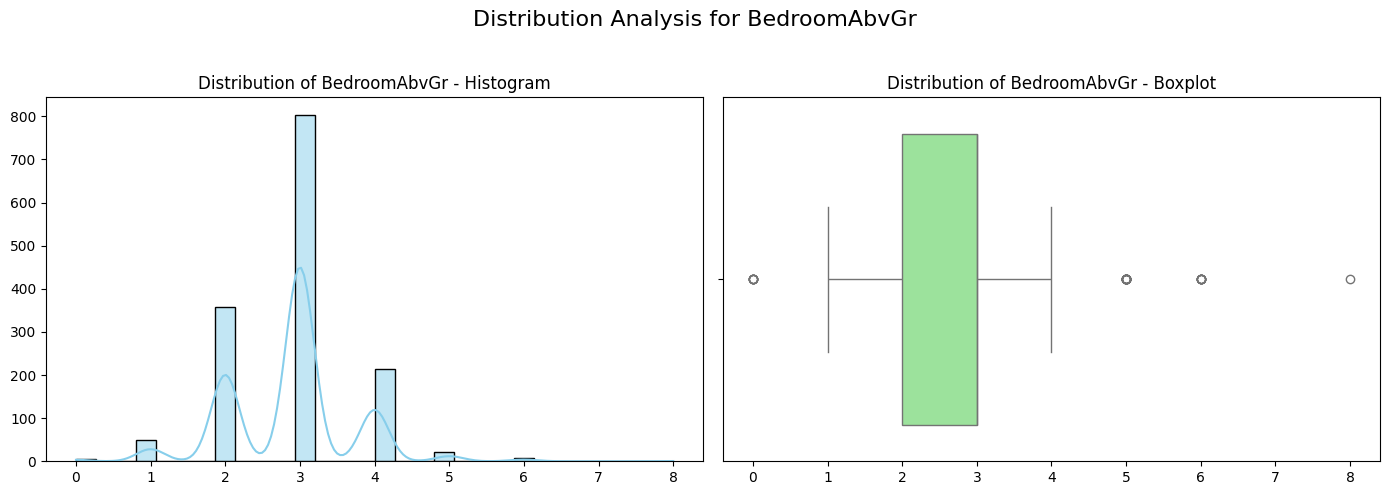

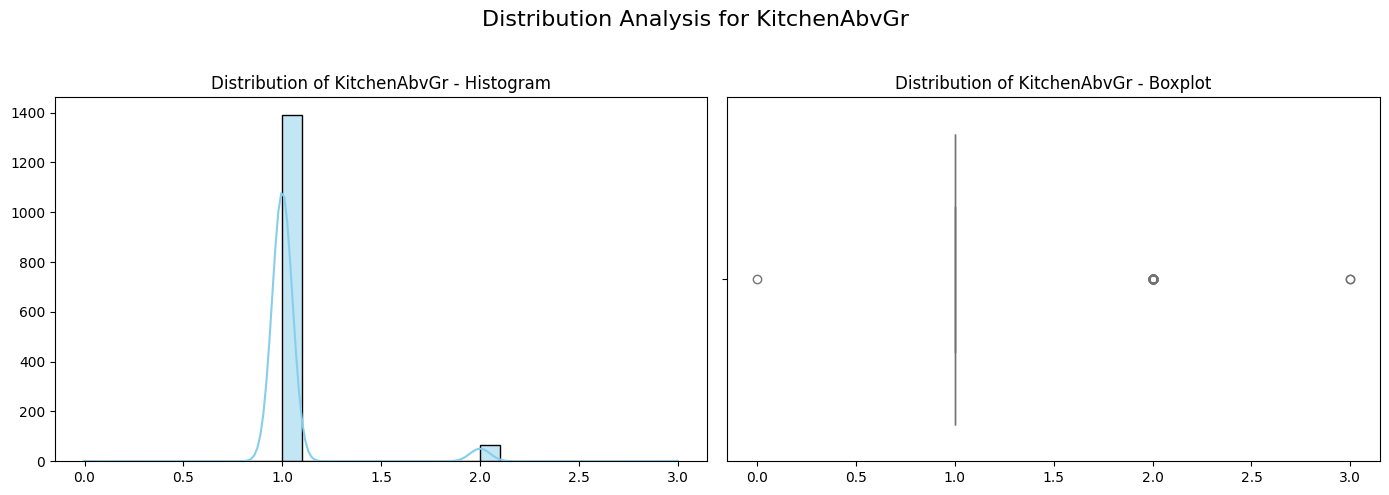

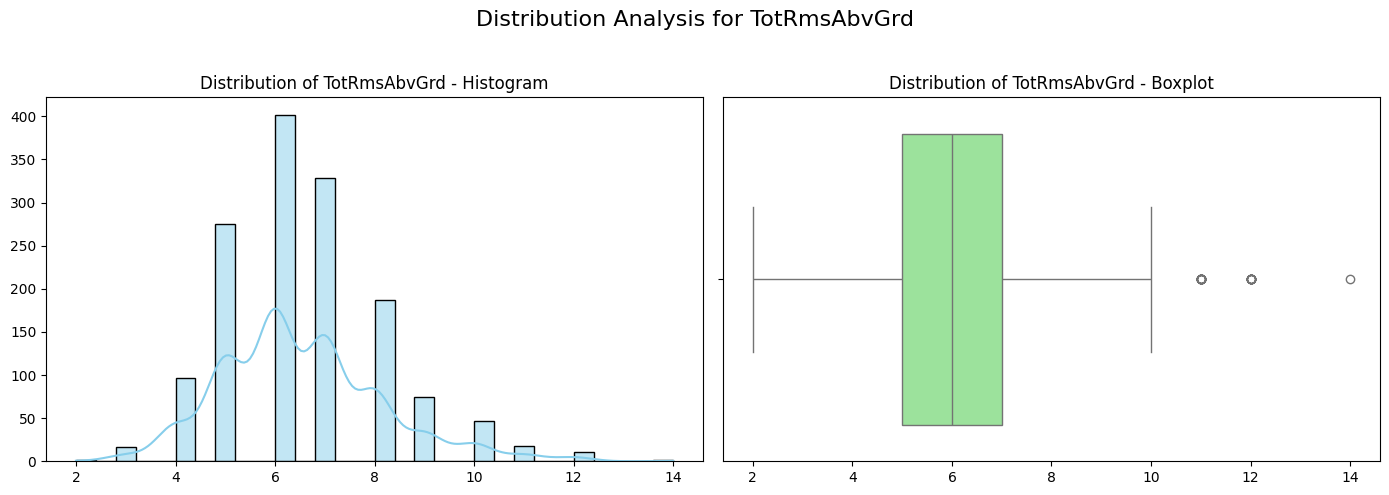

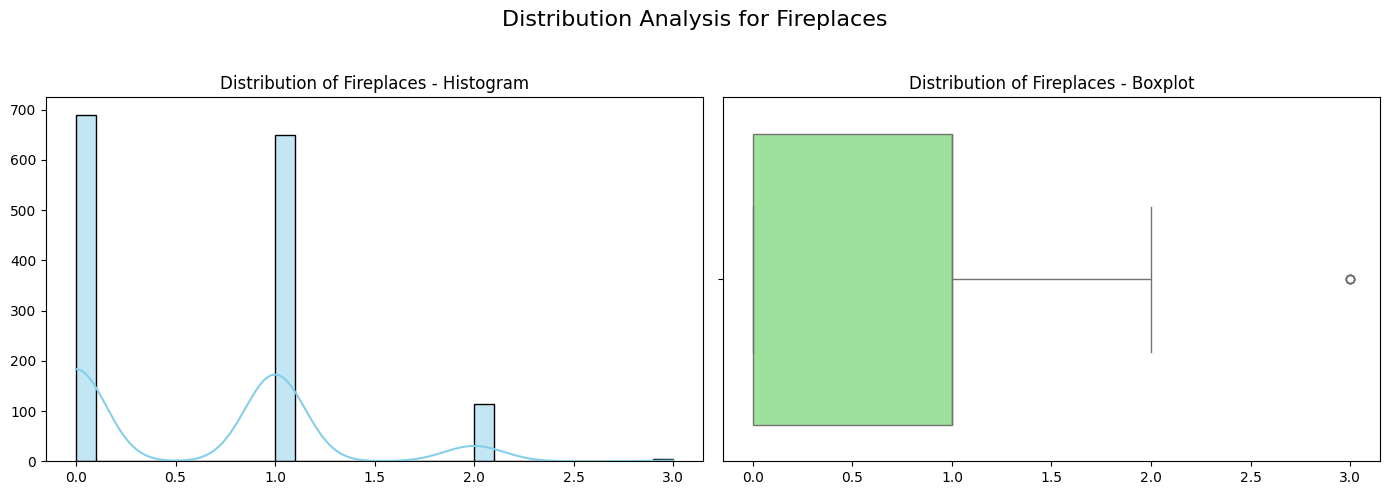

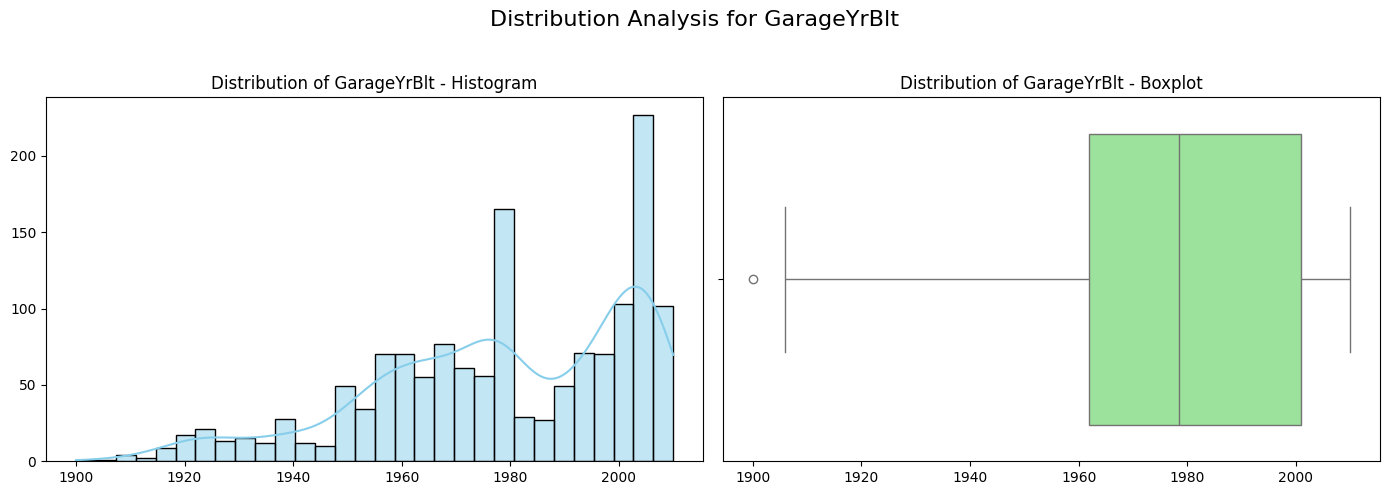

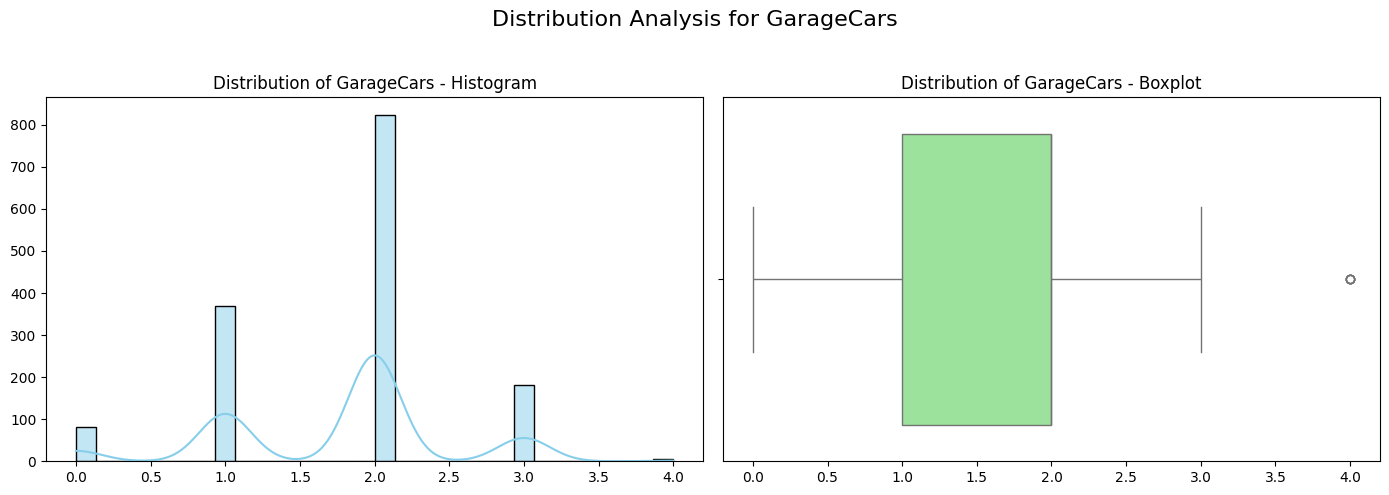

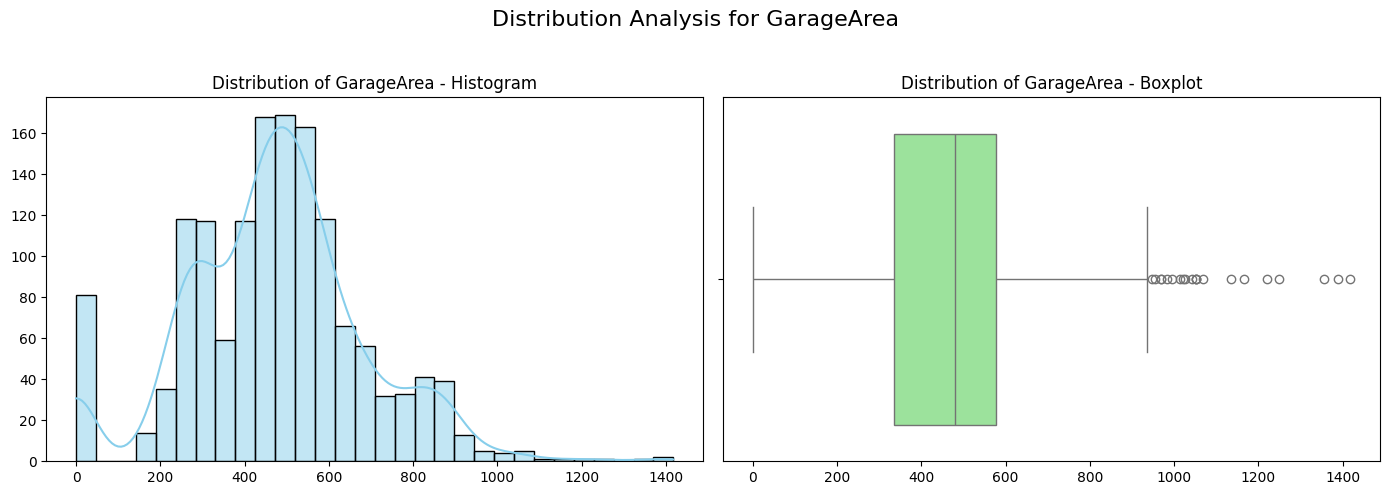

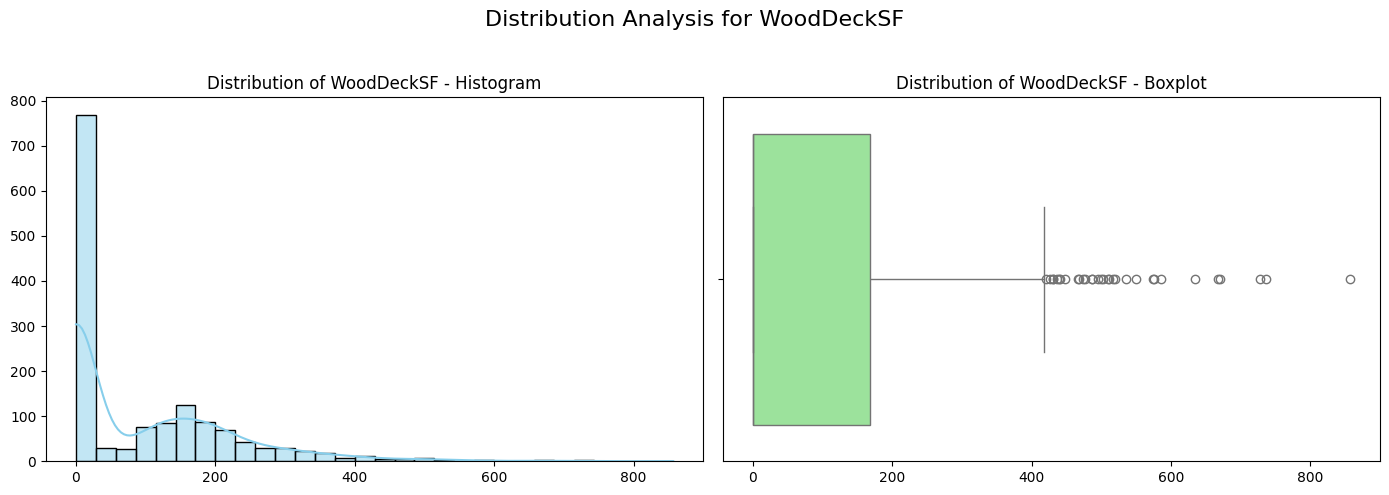

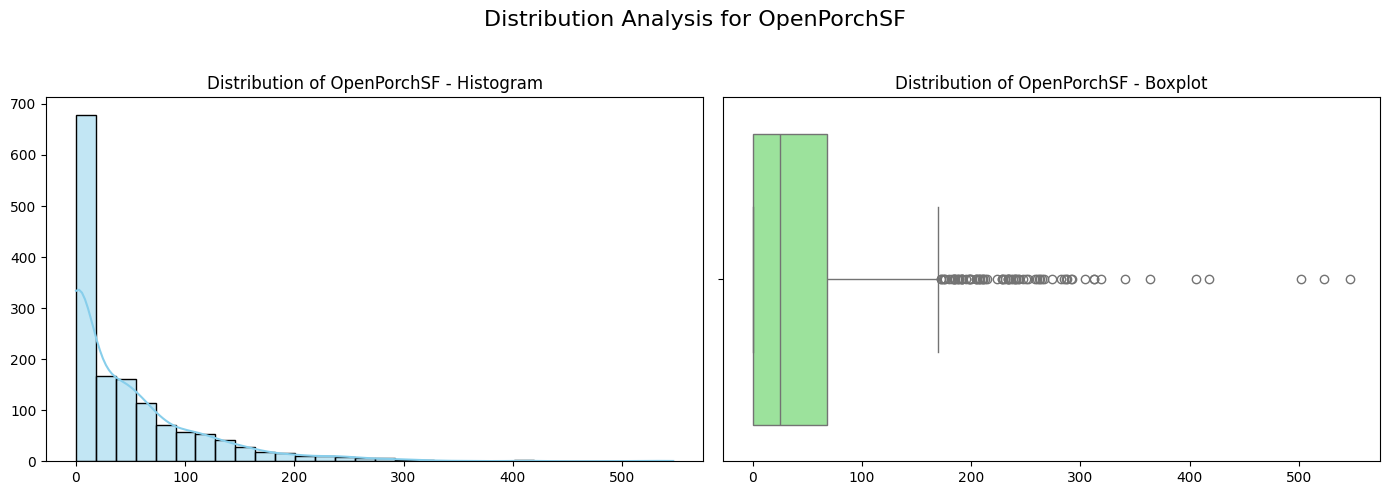

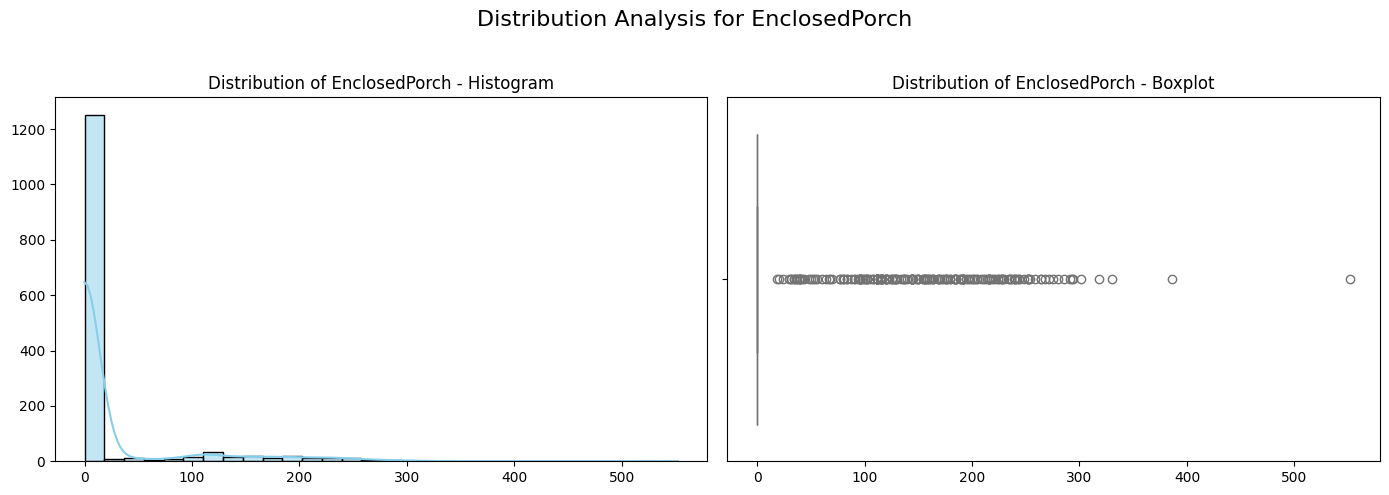

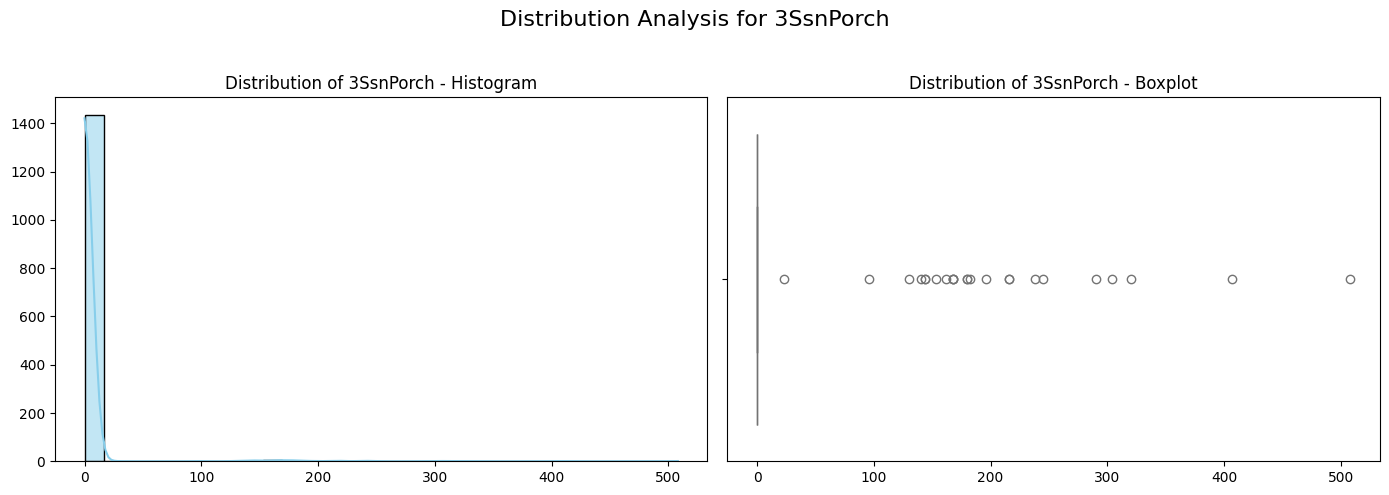

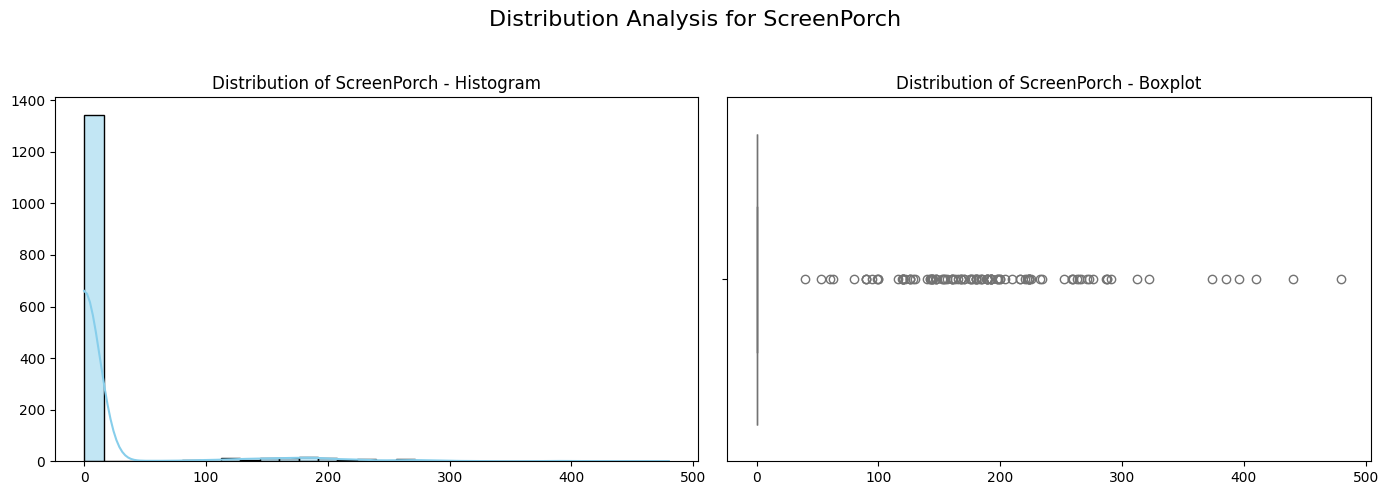

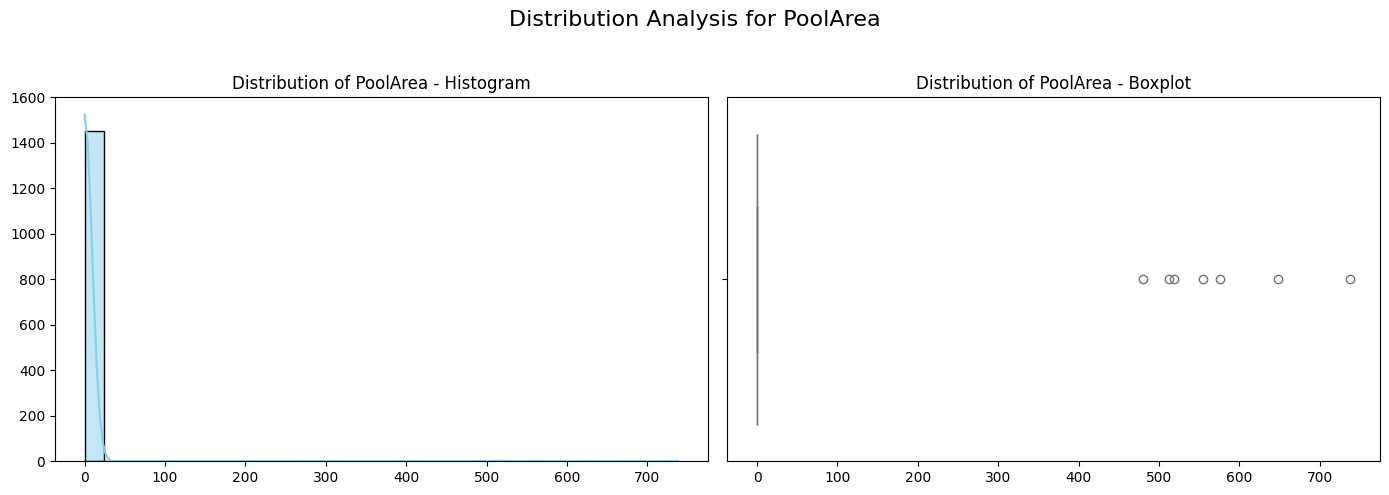

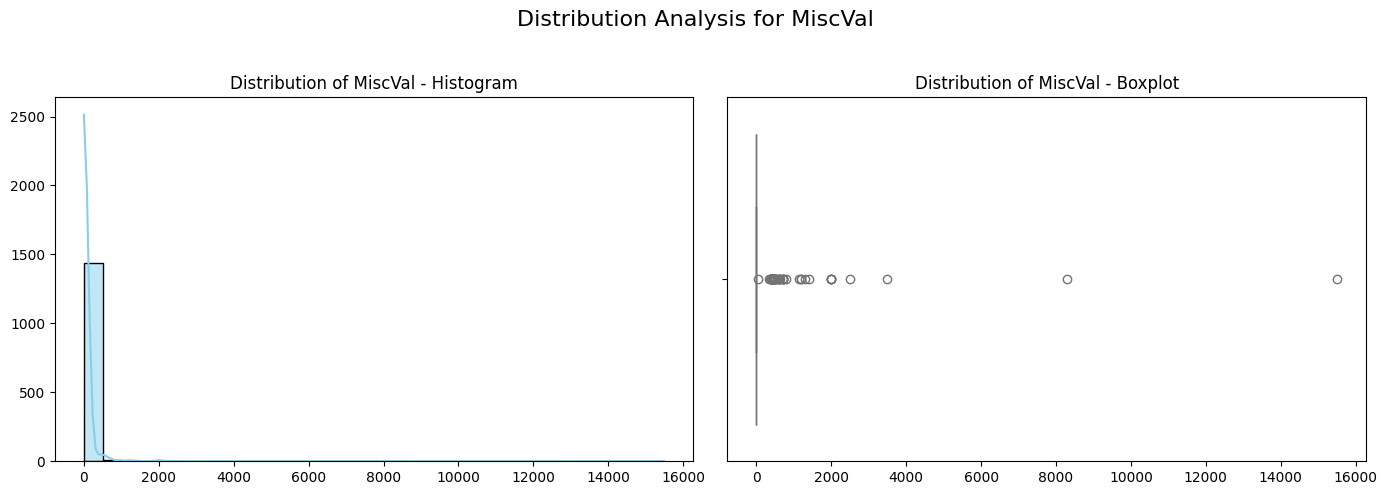

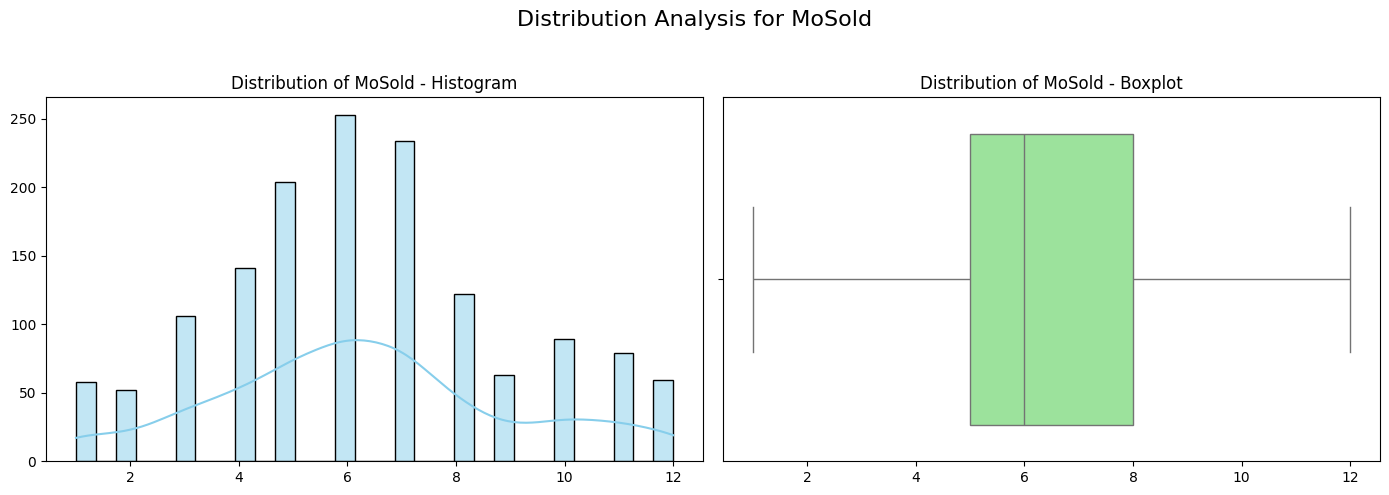

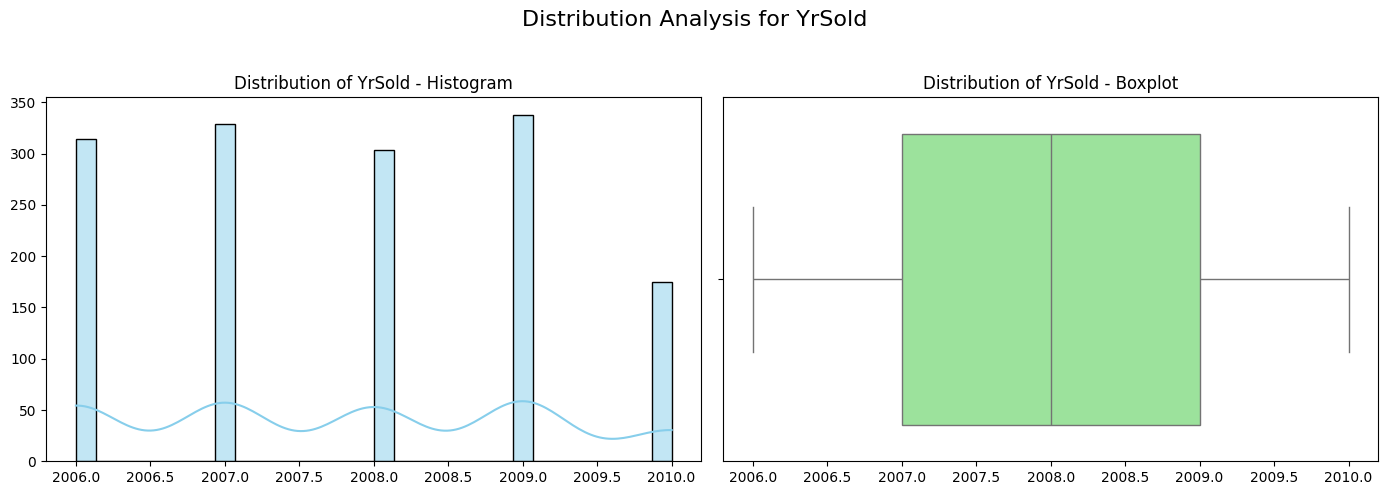

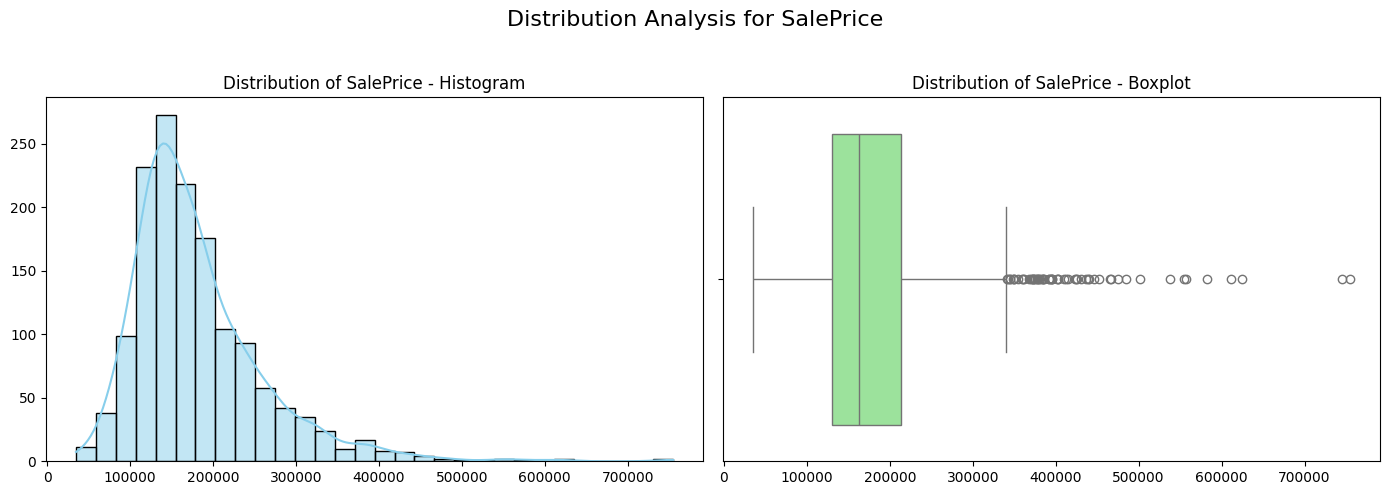

In [57]:
plot_all_numerique(data_numeric)

In [ ]:
# suprime les columns sans intere

data_numeric.drop(['BsmtFinSF2', 'LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],axis=1, inplace=True)

In [ ]:
#selection de columns pour le traitement

lis_standarscaler=['MoSold']
list_minscaler=['MSSubClass','YearBuilt', 'YearRemodAdd','2ndFlrSF','GarageYrBlt','TotRmsAbvGrd']
list_robustscaler=['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BedroomAbvGr','GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'SalePrice']

In [69]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

## Methode StandarScaler

In [89]:
stscaler = StandardScaler()
for col in lis_standarscaler:
    scaled_data = stscaler.fit_transform(data_numeric.loc[:,[col]])
    data_numeric['MoSold']= scaled_data

In [ ]:
data_numeric['MoSold']= scaled_data

## Methode MinMaxScaler

In [88]:
mmscaler = MinMaxScaler()
for col in list_minscaler:
    mmscaler_data = mmscaler.fit_transform(data_numeric.loc[:,[col]])
    data_numeric[col]= mmscaler_data

## Methode RobusScaler

In [90]:
rbscaler = RobustScaler()
for col in list_robustscaler:
    rbscaler_data = rbscaler.fit_transform(data_numeric.loc[:,[col]])

In [91]:
data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
0,0.235294,65.0,8450,7,5,0.949275,0.883333,196.0,706,150,...,0,0.936364,2,548,0,61,0,0.912210,2008,208500
1,0.000000,80.0,9600,6,8,0.753623,0.433333,0.0,978,284,...,1,0.690909,2,460,298,0,0,-0.318683,2007,181500
2,0.235294,68.0,11250,7,5,0.934783,0.866667,162.0,486,434,...,1,0.918182,2,608,0,42,0,-0.318683,2008,223500
3,0.294118,60.0,9550,7,5,0.311594,0.333333,0.0,216,540,...,1,0.890909,3,642,0,35,272,0.296763,2006,140000
4,0.235294,84.0,14260,8,5,0.927536,0.833333,350.0,655,490,...,1,0.909091,3,836,192,84,0,1.527656,2008,250000


6) Concaténer les données après traitement dans un DataFrame

In [ ]:
# concat dataframe 
data_transforme= pd.concat([data_one_hot, data_numeric], axis=1)

In [95]:
data_transforme.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0.936364,2,548,0,61,0,0.912210,2008,208500
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0.690909,2,460,298,0,0,-0.318683,2007,181500
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1,0.918182,2,608,0,42,0,-0.318683,2008,223500
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1,0.890909,3,642,0,35,272,0.296763,2006,140000
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1,0.909091,3,836,192,84,0,1.527656,2008,250000


7) Télecharger les données après le traitement dans un fichier ```clean_data.csv```

In [ ]:
# export data en csv 
data_transforme.to_csv('clean_data.csv')